### Loading the required libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

 - The datasets.cifar10.load_data() function from the Keras library always returns two tuples. The first tuple contains the training data and labels, while the second tuple contains the test data and labels.

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
X_test.shape

(10000, 32, 32, 3)

### Converting the y_train to a 1D array using reshape() function

In [7]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [8]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Writing a python function to plot the images

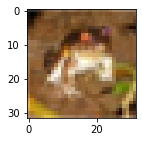

In [9]:
plt.figure(figsize = (15,2))
plt.imshow(X_train[0])

- At position 0, the image is frog

In [10]:
y_train[0]

6

- Therefore 'frog' is labeled as 6 in the dataset
- Similarly, check the labels numbers of the image classes in the dataset

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
def plot(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

- Therefore, there are 10 different classes in the dataset

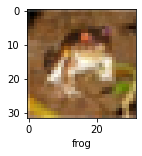

In [13]:
plot(X_train, y_train, 0)

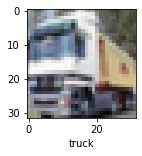

In [14]:
plot(X_train, y_train, 1)

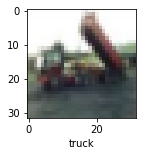

In [15]:
plot(X_train, y_train, 2)

### Normalizong the data before traing the model for better accuracy

In [16]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### Building an ANN to check its performance

In [17]:
model_1 = models.Sequential([
    
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_1.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_1.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 121s 77ms/step - loss: 1.8131 - accuracy: 0.3540
Epoch 2/5
1563/1563 [==============================] - 118s 76ms/step - loss: 1.6228 - accuracy: 0.4270
Epoch 3/5
1563/1563 [==============================] - 128s 82ms/step - loss: 1.5417 - accuracy: 0.4569
Epoch 4/5
1563/1563 [==============================] - 141s 90ms/step - loss: 1.4811 - accuracy: 0.4804
Epoch 5/5
1563/1563 [==============================] - 119s 76ms/step - loss: 1.4325 - accuracy: 0.4955


In [18]:
model_1.evaluate(X_test,y_test)

313/313 [==============================] - 7s 22ms/step - loss: 1.4510 - accuracy: 0.4889


[1.4509961605072021, 0.48890000581741333]

### The accuracy of ANN is very low i.e. 46% over the test data

In [19]:
y_pred = model_1.predict(X_test)

In [20]:
y_pred[0]

array([0.04119148, 0.09588342, 0.10373352, 0.32775956, 0.0391418 ,
       0.13092063, 0.16789897, 0.00459874, 0.08267083, 0.00620112],
      dtype=float32)

In [21]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [22]:
y_pred_labels[0]

3

In [23]:
y_test[0]

array([3], dtype=uint8)

In [24]:
y_test = y_test.reshape(-1,)

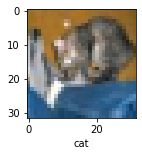

In [25]:
plot(X_test, y_test, 0)

In [26]:
import seaborn as sn

Text(42.0, 0.5, 'Truth')

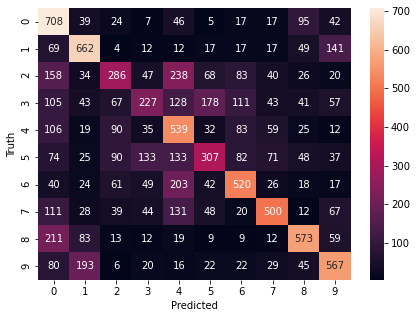

In [27]:
con_matrix = tf.math.confusion_matrix(labels = y_test , predictions = y_pred_labels)

plt.figure(figsize = (7,5))
sn.heatmap(con_matrix, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Building CNN

In [28]:
model_2 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_2.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.4578 - accuracy: 0.47760s - loss: 1.4594 - accuracy
Epoch 2/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.1108 - accuracy: 0.6116
Epoch 3/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9757 - accuracy: 0.6602
Epoch 4/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8920 - accuracy: 0.6887
Epoch 5/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8154 - accuracy: 0.7163
Epoch 6/10
1563/1563 [==============================] - 38s 25ms/step - loss: 0.7552 - accuracy: 0.7377
Epoch 7/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7001 - accuracy: 0.7560
Epoch 8/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.6544 - accuracy: 0.7723
Epoch 9/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.6094 - accuracy: 0.7853
Epoch 10/10
1563/1563 [=============

In [29]:
model_2.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9399 - accuracy: 0.7050


[0.9399010539054871, 0.7049999833106995]

### The accuray of CNN is aorund 69% over the test data

In [30]:
y_pred_2 = model_2.predict(X_test)

In [31]:
y_pred_2[0]

array([1.8178491e-04, 8.8591469e-06, 5.6580678e-03, 9.3214315e-01,
       2.0684435e-03, 1.3175710e-02, 4.5172151e-02, 6.5868435e-06,
       1.2517121e-03, 3.3366811e-04], dtype=float32)

In [32]:
y_pred_classes = [np.argmax(i) for i in y_pred]
# y_pred_classes

In [33]:
y_pred_classes[0]

3

In [34]:
y_test[0]

3

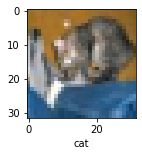

In [35]:
plot(X_test, y_test, 0)